# 1. Import Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 2. Loading Breast Cancer dataset

In [5]:
df = pd.read_csv(r"D:/dataset/breast-cancer-dataset.zip")
if 'Unnamed: 32' in df.columns:
    df = df.drop(['Unnamed: 32'], axis=1)
if 'id' in df.columns:
    df = df.drop(['id'], axis=1)

## Encode target column: M (malignant) = 1, B (benign) = 0

In [6]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

## Split features and target

In [7]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# 2. Scale features

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train/test split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 4. Train SVM models

In [10]:
svm_linear = SVC(kernel='linear', C=1)
svm_rbf = SVC(kernel='rbf', C=1, gamma=0.5)

In [11]:
svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

SVC(C=1, gamma=0.5)

# 5. Evaluate accuracy

In [15]:
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

print("Accuracy (Linear Kernel):" , accuracy_score(y_test, y_pred_linear))
print("Accuracy (RBF Kernel):" , accuracy_score(y_test, y_pred_rbf))

Accuracy (Linear Kernel): 0.9766081871345029
Accuracy (RBF Kernel): 0.8070175438596491


# 6. Cross-validation

In [17]:
cv_linear = cross_val_score(svm_linear, X_scaled, y, cv=5)
cv_rbf = cross_val_score(svm_rbf, X_scaled, y, cv=5)

print("CV Score (Linear): ", cv_linear.mean())
print("CV Score (RBF): " ,cv_rbf.mean())

CV Score (Linear):  0.9701443875174661
CV Score (RBF):  0.8031361589815246


# 7. Visualize with PCA (2D)

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

## Re-train using PCA-reduced 2D data

In [20]:
svm_linear_2d = SVC(kernel='linear', C=1)
svm_rbf_2d = SVC(kernel='rbf', C=1, gamma=0.5)
svm_linear_2d.fit(X_2d, y)
svm_rbf_2d.fit(X_2d, y)

SVC(C=1, gamma=0.5)

## Create mesh grid for plotting decision boundary

In [21]:
xx, yy = np.meshgrid(np.linspace(X_2d[:, 0].min(), X_2d[:, 0].max(), 500),
                     np.linspace(X_2d[:, 1].min(), X_2d[:, 1].max(), 500))

grid = np.c_[xx.ravel(), yy.ravel()]

## Plot Linear SVM boundary

Text(0.5, 1.0, 'Linear Kernel Decision Boundary')

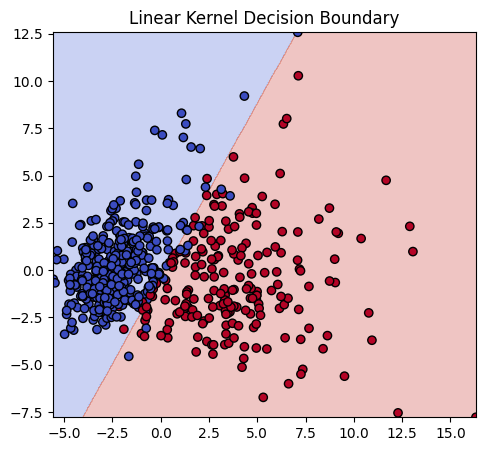

In [22]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
Z = svm_linear_2d.predict(grid).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title('Linear Kernel Decision Boundary')

## Plot RBF SVM boundary

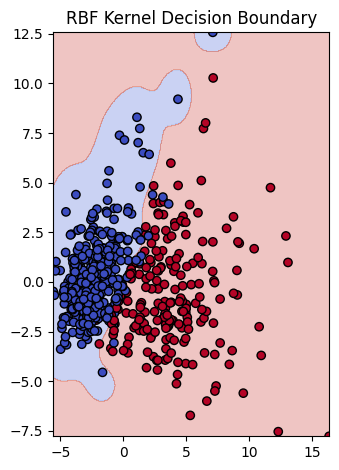

In [23]:
plt.subplot(1, 2, 2)
Z = svm_rbf_2d.predict(grid).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title('RBF Kernel Decision Boundary')

plt.tight_layout()
plt.show()